# Cluster analysys 

![Clustering algorithms](https://miro.medium.com/max/3800/0*zgxSvaRl54FMeSao.png)
*Different clustering algorithms and their run times*

### Definitions

The main goal of cluster analysis is to group objects that are similar in groups or clusters. It is also used to determine wether the data can be separated into distinct subsets.

Clustering algorithms rely on distances between objects. Distance between objects $x_{ij},i = 1, 2, ..., N$ with multiple features $j = 1, 2, ..., p$ can be defined as:
\begin{equation}
D(x_i, x_{i'}) = \sum_{j=1}^{p} d_j(x_{ij}, x_{i'j})
\end{equation}
where $d_j(x_{ij}, x_{i'j})$ is usually the squared distance: \begin{equation}
d_j(x_{ij}, x_{i'j}) = (x_{ij} - x_{i'j})^2
\end{equation}

### Distances for different feature types

* **Quantitative features** - $l_1$, $l_2$ distances
\begin{equation}
d_j(x_{ij}, x_{i'j}) = (x_{ij} - x_{i'j})^2
\end{equation}
* **Ordinal features** - ordered set (grades, dislike/neutral/like)
\begin{equation}
Q(i) = \frac{i - 1/2}{M}, i = 1, ..., M
\end{equation}
where $M$ is the number of distinct values. After this transformation features can be treated as quantitative features.
* **Categorical features** - a symmetric matrix $MxM$ with distances must be explicitly defined.

### Performance

* **Within cluster point scatter** - points within the same cluster must be close to one another, $W(C)$ should be minimised:
\begin{equation}
W(C) = \frac{1}{2}\sum_{k=1}^{K} \sum_{C(i)=k} \sum_{C(i')=k} d(x_{i}, x_{i'})
\end{equation}
* **Between clusters point scatter** - points from different clusters must be far from each other, $B(C)$ should be maximised:
\begin{equation}
B(C) = \frac{1}{2}\sum_{k=1}^{K} \sum_{C(i)=k} \sum_{C(i') \neq k} d(x_{i}, x_{i'})
\end{equation}

Solving the clustering problem is equivalent to maximising $B(C)$ or minimising $W(C)$.

## K-means

*Used for grouping instances of an unlabeled dataset. Requires the number of clusters as input.*

![](https://upload.wikimedia.org/wikipedia/commons/b/b7/SLINK-Gaussian-data.svg)

### Algorithm

**Input**: $K$ - number of cluster centers

1. Randomly select $K$ random points as cluster centers: $\{m_1, m_2, ..., m_K\}$
2. Assign points to clusters minimizing 
\begin{equation}
\min_{C, \{m_k\}_1^K} \sum_{k=1}^K N_k \sum_{C(i) = k} || x_i - m_k || ^ 2
\end{equation}
3. Calculate new cluster means by minimizing
\begin{equation}
\bar{x}_S = \arg\min_{1 \leq k \leq K} \sum_{i \in S} || x_i - m || ^ 2
\end{equation}
4. Repeat steps 2 and 3 until convergence

**Output**: Cluster assignments $C(i)$




## DBSCAN
**Density-based spatial clustering of applications with noise**

*Good for clusters of similar density. Doesn't require prior knowledge on number of clusters*
![](https://upload.wikimedia.org/wikipedia/commons/f/f2/SLINK-density-data.svg) 

DBSCAN classifies points as:
* **Core** - points that have at least $K$ points within $\varepsilon$ radius.
* **Directly reachable** - points that are at most $\varepsilon$ distance from a **core** point.
* **Reachable** - points that can be reached by a **core** point through other reachable **core** points (can form a path of reachable **core** points).
* **Outliers** - points that are nor **core** nor **reachable**.

A cluster contains at least one core point and includes all points that are reachable from that point

### Algorithm

**Input**: 

$\varepsilon$ - distance

$K$ - minimum number of points that are reachable for a point to be a **core** point

1. Select a random unvisited point $i$.
2. If point is a **core** points - start a cluster, otherwise - mark point as noise and go to step 1.
3. Visit every reachable point from $i$ and assign it to the cluster.
4. Repeat steps 1, 2, and 3 until no points are left unvisited.

**Output**: Cluster assignments $C(i)$

### Imports

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns; sns.set(style='white')

from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
rcParams['figure.figsize'] = 12, 12

### Utility plotting functions

In [0]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:gray']
MARKERS = ['o', 'v', 's', '<', '>', '8', '^', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

def plot2d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    
    if mode is not None:
        transformer = mode(n_components=2)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 2, 'plot2d only works with 2-dimensional data'


    plt.grid()
    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        plt.plot(ix[0], ix[1], 
                    c=COLORS[iyp], 
                    marker=MARKERS[iyt])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            plt.plot(cx[0], cx[1], 
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')

    plt.show()

def plot3d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    if mode is not None:
        transformer = mode(n_components=3)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 3, 'plot2d only works with 3-dimensional data'

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.elev = 30
    ax.azim = 120

    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        ax.plot(xs=[ix[0]], ys=[ix[1]], zs=[ix[2]], zdir='z',
                    c=COLORS[iyp], 
                    marker=MARKERS[iyt])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            ax.plot(xs=[cx[0]], ys=[cx[1]], zs=[cx[2]], zdir='z',
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')
    plt.show()

### Load dataset

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

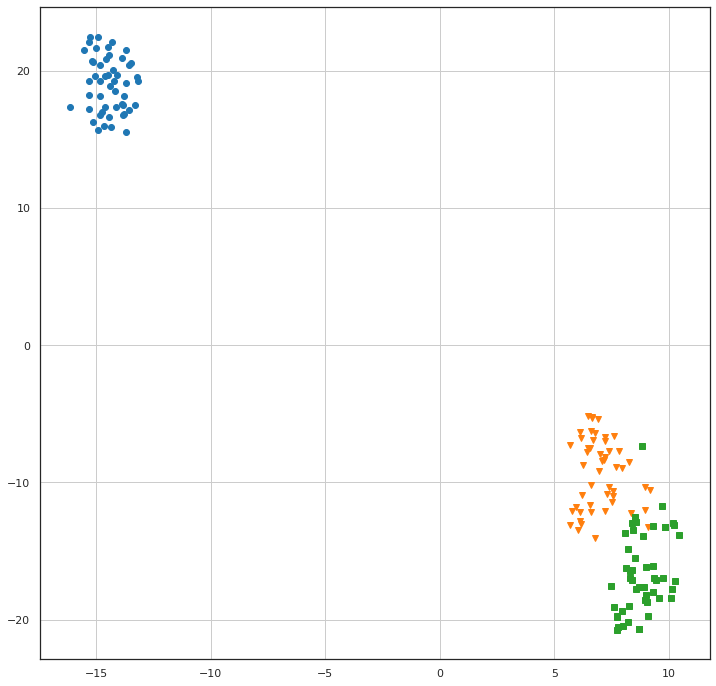

In [4]:
plot2d(X, y, y, TSNE)

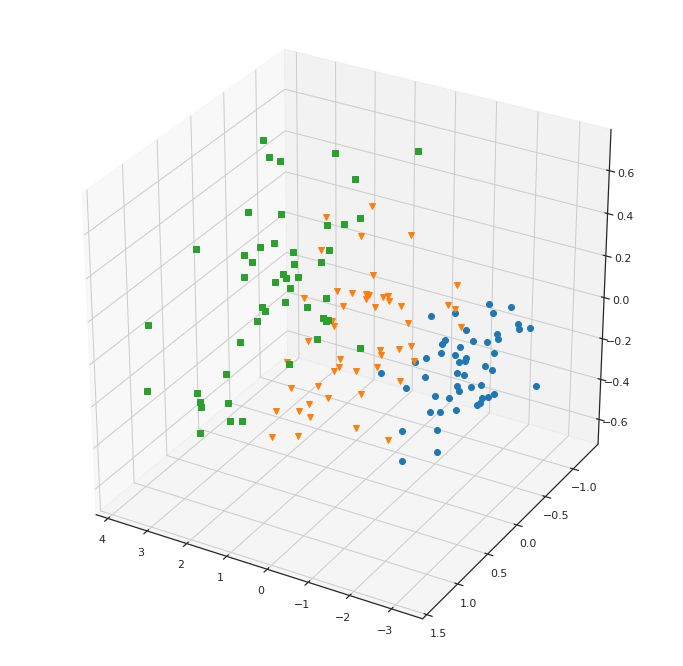

In [5]:
plot3d(X, y, y, PCA)

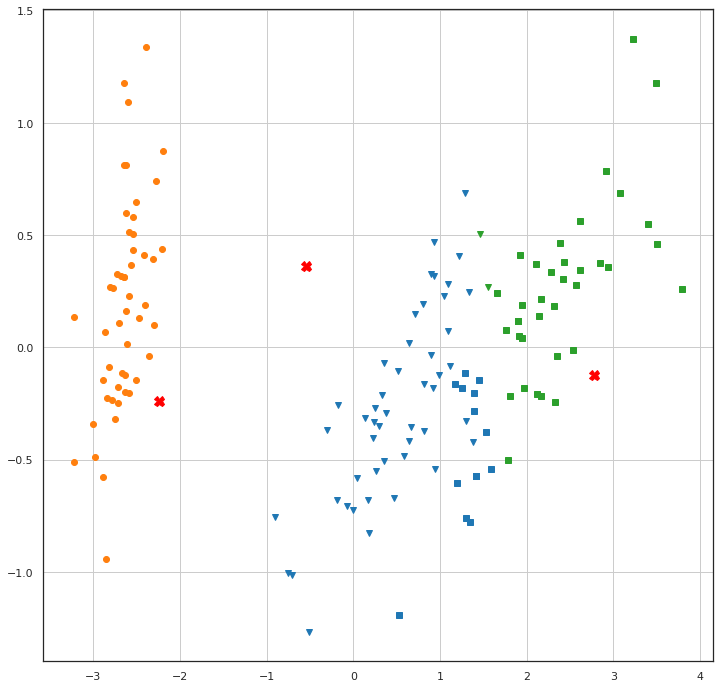

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

plot2d(X, kmeans.labels_, y, mode=PCA, centroids=kmeans.cluster_centers_)

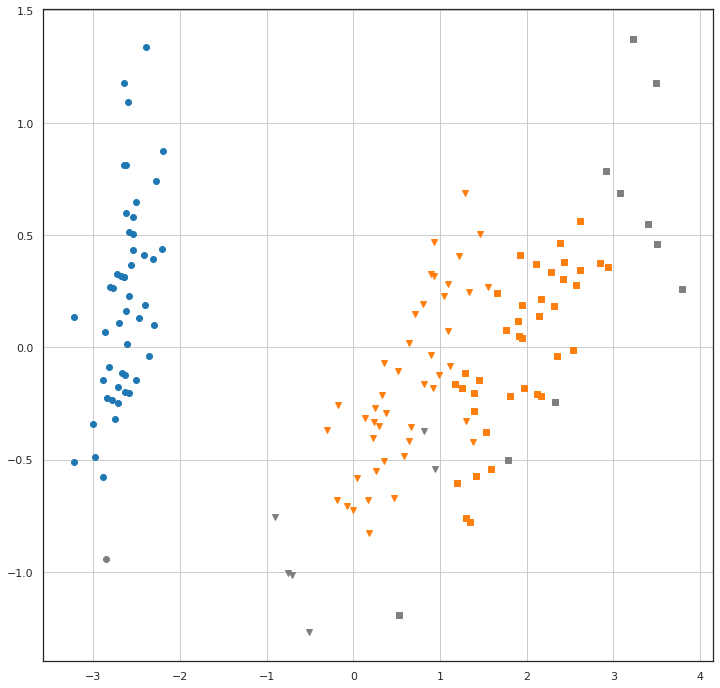

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)

plot2d(X, dbscan.labels_, y, mode=PCA)

# Exercises

### 1. Iris data `X` contains 4 features. Save the last 2 (`X[:, 2:4]`) features from `X` into a different variable `X_r`, apply K-means on it, and plot the results using `plot2d(...)`. 

In [0]:
# write code here

### 2. Using the simpler data from above apply DBSCAN using different values of $\varepsilon$ (`eps`) and $K$ (`min_samples`).

$\varepsilon \in \{0.1, 0.2, 0.3\}$

$min\_samples \in \{2, 3, 4, 5\}$

Print number of clusters detected for each case,  number of elements in each cluster, number of outliers

In [0]:
# write code here

### 3. Plot the clustering that seems to best group the data

In [0]:
# write code here

### Lets load another dataset and plot it

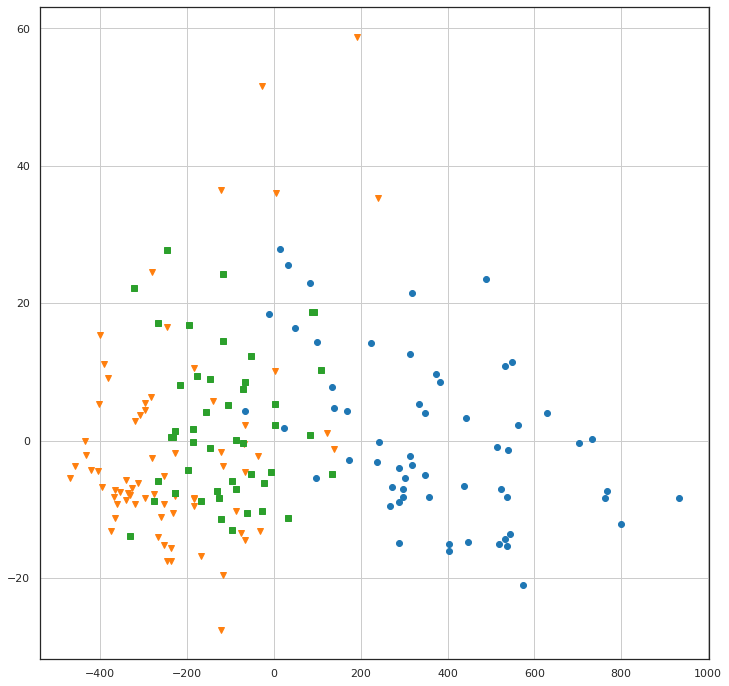

In [11]:
testset = datasets.load_wine()
plot2d(testset.data, testset.target, testset.target, mode=PCA)

We can see it contains 3 classes, you can explore it further, it may be useful for DBSCAN.

In [0]:
### Explore data

### 4. Apply K-means on the new dataset and plot the results

In [0]:
# write code here

### 5. Calculate $B(C)$ (between clusters distance)

In [0]:
def calculate_bc(points, assignments):
    # write code here
    pass

print(calculate_bc(testset.data, kmeans.labels_))

### 6. Calculate $W(C)$ (within cluster distance)

In [0]:
def calculate_wc(points, assignments):
    # write code here
    pass

print(calculate_wc(testset.data, kmeans.labels_))

### 7. Calculate the best parameters for the DBSCAN at exercise 2 using either $W(C)$ or $B(C)$ metric

In [0]:
# write code here

## FIN